# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\myildirim\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


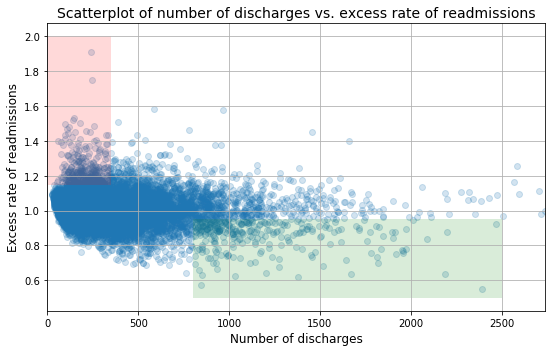

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
#We need additional libraries
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

C:\Users\myildirim\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
#Rename the data to something shorter and check summary
df = clean_hospital_read_df
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
# Check how many nulls.
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

Let's make sure the 81 null values are all on the same rows. We can drop all null rows and make sure that adds to only 81.

In [10]:
temp = df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                         'Number of Readmissions'])
len(df)-len(temp)

81

We can just drop those rows so they do not interfere with the analysis.

In [11]:
df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                         'Number of Readmissions'], inplace=True)

Question A: Do you agree with the above analysis and recommendations? Why or why not?

    A. Initial observations based on the plot above
        Overall, rate of readmissions is trending down with increasing number of discharges
        With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
        With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
        
The plot created in the report is a bit of a mess. It is a scatterplot with over 10,000 points which makes it difficult to discern any real trends. It is not clear how (or why) the boundaries of the shaded regions were chosen. The clustering of many points in those regions (and elsewhere) make these statements difficult to approve.

    B. Statistics
        In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess > readmission rate greater than 1
        In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
            
Again, we are left to wonder why this specific booundary was used. It is not clear why less than 100 and greater than 1000 were used, since the low and high demarcation used in the previous section (in the form of shaded boxes) was 350 and 800, respectively. Regardless, this is something we can test. So let's do some of those calculations to verify.

In [12]:
df_lt_100  = df[df['Number of Discharges'] < 100 ]
df_gt_1000 = df[df['Number of Discharges'] > 1000]

mean_read_rate_lt_100  = df_lt_100 ['Excess Readmission Ratio'].mean()
mean_read_rate_gt_1000 = df_gt_1000['Excess Readmission Ratio'].mean()

tot_lt_100  = len(df_lt_100 )
tot_gt_1000 = len(df_gt_1000)

num_lt_100  = len(df_lt_100 [df_lt_100 ['Excess Readmission Ratio'] > 1])
num_gt_1000 = len(df_gt_1000[df_gt_1000['Excess Readmission Ratio'] > 1])

excess_rate_lt_100  = num_lt_100  * 100.0 / tot_lt_100
excess_rate_gt_1000 = num_gt_1000 * 100.0 / tot_gt_1000

print('When num of discharges %s, mean excess re-admit rate is %.3f and %i%% have excess re-admit rate greater than 1.' 
      % ('<  100', mean_read_rate_lt_100, excess_rate_lt_100))
print('When num of discharges %s, mean excess re-admit rate is %.3f and %i%% have excess re-admit rate greater than 1.' 
      % ('> 1000', mean_read_rate_gt_1000, excess_rate_gt_1000))

When num of discharges <  100, mean excess re-admit rate is 1.023 and 63% have excess re-admit rate greater than 1.
When num of discharges > 1000, mean excess re-admit rate is 0.978 and 44% have excess re-admit rate greater than 1.


These are the correct calculations.

    C. Conclusions
        There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
        Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

No evidence is given for this significant correlation. Further, this supposed correlation is taken to be causation which is certainly inappropriate without further study and analysis. But we can quickly calculate the correlation between the two columns.

In [13]:
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The correlation is around -0.09, which is quite small as far as correlations often go. It does suggest a small correlation to be sure, however, it is a far cry from the strong correlation advertised.

    D. Regulatory policy recommendations
        Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
        Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Again, recommendations are given without any solid analysis. It is also curious that the only statistical evidence involved small hospitals defined as less than 100 whereas here they are defined as less than 300. This is another instance where numbers are given without explanation or further context.

Question B: Provide support for your arguments and your own recommendations with a statistically sound analysis.

Question B1: Setup an appropriate hypothesis test.
There is some sense that number of discharges and readmission rates are correlated. Given that the original report classified small hospitals as those with less than 100 discharges and large hospitals as those with more than 1000 discharges and used those in the statistical analysis, I will do the same for mine. I have no other reason to do this except that. This is not within my previous experience, so if I were seriously doing this I would need some assistance from someone who has domain knowledge and can give some helpful tips on best practices and industry standards. With that in mind, we can define our hypothesis tests.

Mean Excess Readmission Ratio: The null hypothesis is there is no difference in mean excess readmission ratios between the small and large hospitals. The alternative hypothesis says there is a difference.

Proportion of Hospitals with Excess Readmission Ratio > 1: The null hypothesis is there is no difference in the proportions of excess readmission ratio for the small and large hospitals. The alternative hypothesis says there is a difference.

Question B2: Compute and report the observed significance value (or p-value).
We can start by testing the first hypothesis. We can perform either a t- or z-test here but a z-test might be better since we do have significantly more values than the minimum of 30. Here we will use statsmodel to perform the z-test as well as compute the confidence interval (at 95%).

In [14]:
res = sms.CompareMeans(sms.DescrStatsW(df_lt_100 ['Excess Readmission Ratio']), 
                       sms.DescrStatsW(df_gt_1000['Excess Readmission Ratio']))

z_stat, p_value = res.ztest_ind(usevar='unequal')
z_lower, z_upper = res.zconfint_diff(alpha=0.05, usevar='unequal')

print('The z-test statistic is %f with a p-value of %e.' % (z_stat, p_value))
print('The 95%% CI is %f to %f.' % (z_lower, z_upper))

The z-test statistic is 7.601742 with a p-value of 2.921698e-14.
The 95% CI is 0.032865 to 0.055700.


The p-value of the test is very small at 2.9e-14. The 95% confidence interval does not cover 0, which also implies that the difference in mean excess readmission ratios is real. In other words we can safely reject the null hypothesis and conclude there is a real statistical difference between the mean the excess readmission ratios for small and large hospitals.

We can calculate a z-test for the second hypothesis as well. This is a difference in proportions test which we can do by hand since we also should calculate a 95% CI.

In [15]:
#Proportions z-test with statsmodels (we get the same results)
#sms.proportions_ztest(np.asarray([num_lt_100, num_gt_1000]), 
#                      np.asarray([tot_lt_100, tot_gt_1000]), value=0)

#Calculate the proportion for excess readmissions rate > 1 for small/large hospitals
prop_l = 1. * num_lt_100  / tot_lt_100  
prop_g = 1. * num_gt_1000 / tot_gt_1000 

#Calculate the pooled proportion
prop_pool = (prop_l * tot_lt_100 + prop_g * tot_gt_1000) / (tot_lt_100 + tot_gt_1000)

#Calculate the difference in proportions
prop_diff = np.abs(prop_l-prop_g)

#Calculate the standard error between proportions
std_error = np.sqrt(prop_pool * (1-prop_pool) * ((1./tot_lt_100) + (1./tot_gt_1000)))

#Calculate the z-score for this exercise
z = prop_diff / std_error

#Assume a confidence level of 0.95
CL = 0.95

#Calculate the margin of error
margin_error = stats.norm.ppf(1-((1-CL)/2)) * std_error

#Calculate the 95% CI from the difference of proportions
ci_lower, ci_upper = stats.norm.interval(CL, loc=prop_diff, scale=std_error)

#Calculate the p-value 
p_value = (1-stats.norm.cdf(z))*2

print("  %-30s | %s" % ('Calculation', 'Value'))
print(60 * '=')
print("  %-30s | %.8f" % ('Readmit Ratio>1 for small hosp', prop_l))
print("  %-30s | %.8f" % ('Readmit Ratio>1 for large hosp', prop_g))
print("  %-30s | %.8f" % ('Difference in proportions', prop_diff))
print("  %-30s | %.8f" % ('Pooled proportions', prop_pool))
print("  %-30s | %.8f" % ('Standard Error', std_error))
print("  %-30s | %.8f" % ('z-test statistic', z))
print("  %-30s | %.8f" % ('Margin of Error', margin_error))
print("  %-30s | %.8f to %.8f" % ('%i%% Confidence Interval' % (CL*100), ci_lower, ci_upper))
print("  %-30s | %.8e" % ('z-test p-value', p_value))

  Calculation                    | Value
  Readmit Ratio>1 for small hosp | 0.63215488
  Readmit Ratio>1 for large hosp | 0.44492441
  Difference in proportions      | 0.18723048
  Pooled proportions             | 0.57964870
  Standard Error                 | 0.02704353
  z-test statistic               | 6.92329903
  Margin of Error                | 0.05300435
  95% Confidence Interval        | 0.13422612 to 0.24023483
  z-test p-value                 | 4.41247039e-12


Very similar to the previous test, we have a p-value of 4.4e-12. Along with the 95% CI, it is clear we can reject the null hypothesis and accept a statistical difference between the proportion of (small/large) hospitals with excess readmission ratios greater than one.

Question B3: Report statistical significance for $\alpha$ = .01.
In both hypotheses, the p-values were much smaller than a significance level of 0.01. So there is no real change in the statistical significance we already have determined.

Question B4: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
There is without question strong signifiance when we compare hospitals with less than 100 discharges against those with more than 1000 discharges. However, is this the most practical method of quantifying the relationship between hospital discharges and readmission ratios? It is difficult to say since there can be many other confounding factors at work. For instance there could be socioeconomic issues surrounding certain hospitals much more than others thereby influencing this type of analysis. Further, we need to have solid reasoning to use hospitals with less than 100 discharges and hospitals with more than 1000 discharges. Why are other hospitals not used or neglected?

Thus, it most prudent to try to quantify other factors that may be affecting how hospitals have readmissions before being able to definitively say larger hospitals are better equiped to deal with readmissions.

Question B5: Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.
I had some serious concerns with the given plot. It shows too much data with little way of extracting too much useful information from it. Further, it was used as a basis of unsound claims. It is nice to be able to show the entire dataset in one plot, but again when it is of a certain size the sheer amount is overwhelming.

There are a couple different ways that we can go to come up with a better visual. Let's go over a few of them.

A (better) scatterplot.
We can produce a scatterplot that also displays additional information. A joint plot will show the !-D histograms on the margins. This can help show a little how the individual variables are distributed. Additionally, we can add a regression line (red) to the plot which shows the relationship between the two variables. The Pearson coefficient along with its associated p-value are also printed on the plot to give a feeling for the strength of this relationship.

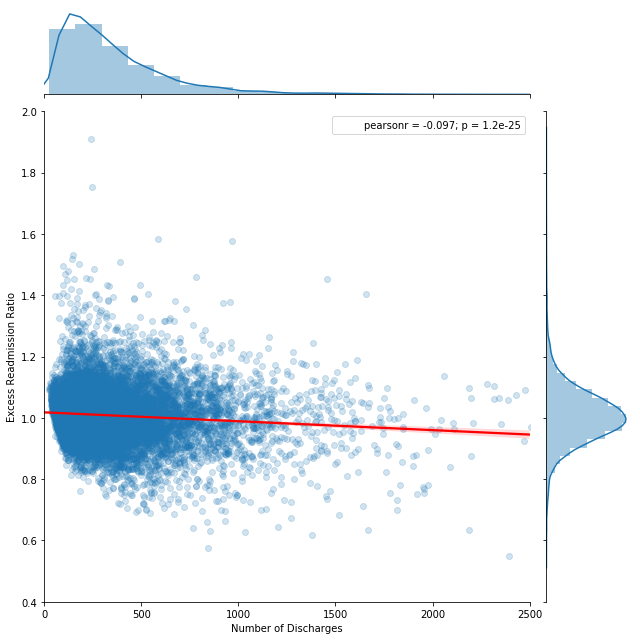

In [16]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg', size=9, 
              xlim=(0,2500), ylim=(0.4,2.0), joint_kws={'line_kws':{'color':'red'}}, scatter_kws={'alpha': 0.2})
#plt.xlim(0,3000)
#plt.ylim(0.4,2.0)
plt.show()

Instead of using a scatterplot, we can condense some of the points into hexagonal bins to form a hexplot. This has the advantage of pooling together counts to create a more continuous plot. We can again also include marginal plots to give some context about the individual distributions on the plot. The shade of the hex bins give us insight into the relative frequency of points within the bin, so we can see that most points are hospitals with less than 200 discharges and excess readmission ratio around 1.0 ($\pm$ 0.5).

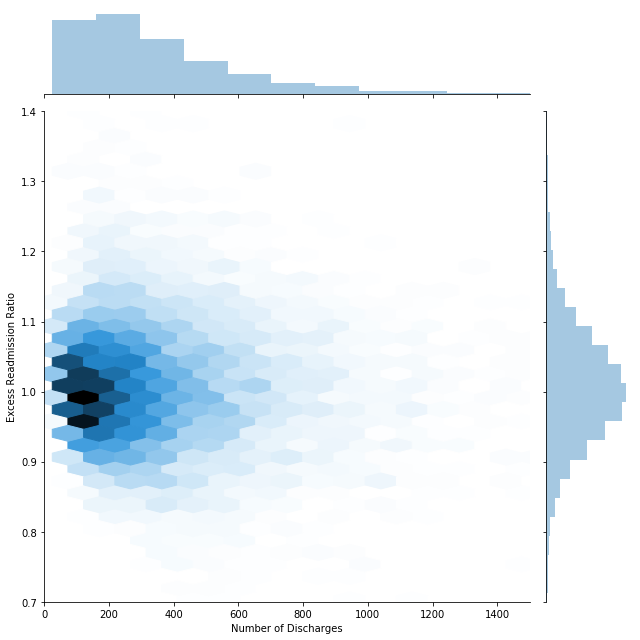

In [17]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, stat_func=None,
              kind='hex', size=9, xlim=(0,1500), ylim=(0.7,1.4), joint_kws=dict(gridsize=70))
plt.show()

We can continue to condense the plot even further by introducing violinplots. These are box plots which also show width consistent with the probability density of the variable. We bin the number of discharges so that we can construct the violinplots. The number and size of this binning structure is very much fluid. In fact this is perhaps best down with the consultation with someone with domain knowledge to this problem. We can chose a binning structure somewhat consistent to the original report.

Let's split the data into 4 bins then: those with less than 100 discharges (very small), those with discharges between 100 and 300 (small), those with discharges between 300 and 1000 (medium), and those with more than 1000 discharges (large). Then we can also add a line plot which shows the average within each bin. Each point also has an associated errorbar (calculated using bootstrapping). This does show the general downward trend, though it is slight (as we know). This plot helps condense the information while also showing the likely underlying relationship. This plot also relies on having done exploratory analysis beforehand so it is not the best first plot to make. However, it can be a great plot to help elucidate relationships, once they are found.

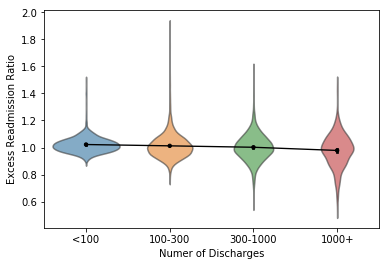

In [18]:
#Construct the bin structure and add a new column for it
bins = [0,100,300,1000,1000000]
group_bins = ['<100','100-300','300-1000','1000+']
df['discharge-categories'] = pd.cut(df['Number of Discharges'], bins, labels=group_bins)

#Plot violinplot with pointplot overlayed
ax = sns.violinplot(data=df, x='discharge-categories', y='Excess Readmission Ratio', inner=None)
plt.setp(ax.collections, alpha=0.6)
sns.pointplot(data=df, x='discharge-categories', y='Excess Readmission Ratio', color='black', scale=0.5)
plt.xlabel('Numer of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()